# Exercise Sheet 1a



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [1]:
import numpy as np 
import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
data_csv = pd.read_csv("./covertype.csv") 

#Random shuffle
data_csv = data_csv.sample(frac=1).reset_index(drop=True)
x = data_csv.iloc[:,np.arange(55).tolist()] 
y = data_csv["Cover_Type"]
print ("Feature set shape:", x.shape)
print("Labels shape:", y.shape)
train_set_number = int(x.shape[0] * 0.7)
train_x = x[: train_set_number].values
train_y = y[: train_set_number].values
test_x = x[train_set_number: ].values
test_y = y[train_set_number: ].values

print("samples in train set: ", train_x.shape)
print ("Samples in test set:", test_x.shape)

Feature set shape: (15120, 55)
Labels shape: (15120,)
samples in train set:  (10584, 55)
Samples in test set: (4536, 55)


### Train a simple deep neural network
- Use Pytorch to define a simple Multi-Layer Perceptron with at least 3 layers
    - The input layer should have as many neurons as there are features
        - How many features are there?
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Pack your training and testing datasets in a class which inherits from torch.utils.data.Datset
    - features you input to your network should be of type torch.float
    - labels should be of type torch.long.
- Use a torch.utils.data.DataLoader to access your data in batches
- Train the MLP with your data from the train_loader using Cross-Entropy Loss and the Adam Optimizer
    - Make sure to save the training history for later assessment
- Evaluate the performance on your test_loader

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define your MLP
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(55, 64)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(64,128)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(128,7)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,55)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x





In [12]:
# Create your DataLoaders

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
class DS(Dataset):

    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):

        sample = self.features[idx]
        label = self.labels[idx]

        return torch.tensor(sample).float(), torch.tensor(label)-1




In [37]:
# Instantiate the network, the optimizer and the Loss Criterion
model = Net()
criterion = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = 0.0000051)
dataset = DS(train_x, train_y)
test_dataset = DS(test_x, test_y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



In [38]:
# Define your training Loop
def train_epoch(model, dataloader, criterion, optimizer): 
    model.train()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for i, (data, label) in enumerate(dataloader):  
        optimizer.zero_grad()  
        prediction = model(data) 
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        if i%100 == 0:
            print ("Loss:  ", loss.item())
            print ("Accuracy: ", sum(torch.argmax(prediction, dim=1) == label)/ data.shape[0])
        samples += len(data)
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    return epoch_loss, correct/samples


# Define your testing Loop
def test_epoch(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for data, label in dataloader: 
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
    return epoch_loss, correct/samples
    


In [39]:
# Check if your training and testing loops are working
# for test in train_loader: 
train_epoch(model, train_loader, criterion, optimizer)
test_epoch(model, train_loader,  criterion)


Loss:   152.57240295410156
Accuracy:  tensor(0.1250)
Loss:   55.68313980102539
Accuracy:  tensor(0.2500)
Loss:   39.206546783447266
Accuracy:  tensor(0.1250)
Loss:   32.86322021484375
Accuracy:  tensor(0.0625)
Loss:   13.31076717376709
Accuracy:  tensor(0.4375)
Loss:   13.012872695922852
Accuracy:  tensor(0.2500)
Loss:   14.233936309814453
Accuracy:  tensor(0.1875)


(tensor(3330.0588), tensor(0.2460))

### Debug
- If there is a RuntimeError raised in you loss function, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [ ]:
# Inspect your data
import numpy as np

#working fine



In [ ]:
# Fix your data and recreate your DataLoaders





### Train your Network
- Reinitialize your MLP from above and train it for 100 epochs

In [40]:
import tqdm
 

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(model, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(model, train_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

    

Loss:   10.081393241882324
Accuracy:  tensor(0.3750)
Loss:   8.769367218017578
Accuracy:  tensor(0.)
Loss:   3.1458523273468018
Accuracy:  tensor(0.1250)
Loss:   6.013240814208984
Accuracy:  tensor(0.1875)
Loss:   3.0856752395629883
Accuracy:  tensor(0.2500)
Loss:   5.408188343048096
Accuracy:  tensor(0.1875)
Loss:   2.206892967224121
Accuracy:  tensor(0.1250)
Loss:   4.159694671630859
Accuracy:  tensor(0.1250)
Loss:   1.9713820219039917
Accuracy:  tensor(0.1875)
Loss:   2.4299139976501465
Accuracy:  tensor(0.2500)
Loss:   1.8682301044464111
Accuracy:  tensor(0.1875)
Loss:   1.9877125024795532
Accuracy:  tensor(0.1250)
Loss:   2.4794068336486816
Accuracy:  tensor(0.2500)
Loss:   4.162358283996582
Accuracy:  tensor(0.)
Loss:   3.2683746814727783
Accuracy:  tensor(0.1875)
Loss:   6.433634281158447
Accuracy:  tensor(0.1875)
Loss:   3.8104023933410645
Accuracy:  tensor(0.1250)
Loss:   2.0676629543304443
Accuracy:  tensor(0.1875)
Loss:   5.614898681640625
Accuracy:  tensor(0.2500)
Loss:   2

Loss:   1.7211734056472778
Accuracy:  tensor(0.2500)
Loss:   1.7332444190979004
Accuracy:  tensor(0.1250)
Loss:   1.649410605430603
Accuracy:  tensor(0.3750)
Loss:   1.6023268699645996
Accuracy:  tensor(0.3125)
Loss:   1.7525982856750488
Accuracy:  tensor(0.1875)
Loss:   1.8288559913635254
Accuracy:  tensor(0.1875)
Loss:   1.9842860698699951
Accuracy:  tensor(0.1875)
Loss:   2.032735824584961
Accuracy:  tensor(0.2500)
Loss:   1.9761338233947754
Accuracy:  tensor(0.1875)
Loss:   2.2033467292785645
Accuracy:  tensor(0.1250)
Loss:   1.6991544961929321
Accuracy:  tensor(0.3125)
Loss:   2.449144124984741
Accuracy:  tensor(0.1250)
Loss:   1.495549201965332
Accuracy:  tensor(0.5000)
Loss:   2.284252405166626
Accuracy:  tensor(0.3125)
Loss:   1.7537891864776611
Accuracy:  tensor(0.2500)
Loss:   1.8635073900222778
Accuracy:  tensor(0.1250)
Loss:   1.8712658882141113
Accuracy:  tensor(0.4375)
Loss:   1.8212430477142334
Accuracy:  tensor(0.1875)
Loss:   1.9477263689041138
Accuracy:  tensor(0.1250

Loss:   1.7138882875442505
Accuracy:  tensor(0.4375)
Loss:   1.955209493637085
Accuracy:  tensor(0.3750)
Loss:   1.9200129508972168
Accuracy:  tensor(0.1875)
Loss:   1.9979758262634277
Accuracy:  tensor(0.1875)
Loss:   1.901343584060669
Accuracy:  tensor(0.3125)
Loss:   1.7456855773925781
Accuracy:  tensor(0.3750)
Loss:   1.6722139120101929
Accuracy:  tensor(0.3750)
Loss:   1.733581781387329
Accuracy:  tensor(0.3750)
Loss:   1.7811574935913086
Accuracy:  tensor(0.3750)
Loss:   1.59462571144104
Accuracy:  tensor(0.3750)
Loss:   1.9444466829299927
Accuracy:  tensor(0.1250)
Loss:   1.6152421236038208
Accuracy:  tensor(0.4375)
Loss:   1.9148681163787842
Accuracy:  tensor(0.1875)
Loss:   1.6467008590698242
Accuracy:  tensor(0.2500)
Loss:   1.75724458694458
Accuracy:  tensor(0.2500)
Loss:   2.0614376068115234
Accuracy:  tensor(0.1875)
Loss:   1.8068335056304932
Accuracy:  tensor(0.2500)
Loss:   1.5455507040023804
Accuracy:  tensor(0.4375)
Loss:   1.8565571308135986
Accuracy:  tensor(0.1250)


Loss:   1.6860992908477783
Accuracy:  tensor(0.1250)
Loss:   1.4972271919250488
Accuracy:  tensor(0.4375)
Loss:   1.4469789266586304
Accuracy:  tensor(0.3750)
Loss:   1.8855857849121094
Accuracy:  tensor(0.1250)
Loss:   1.6627222299575806
Accuracy:  tensor(0.2500)
Loss:   1.7516264915466309
Accuracy:  tensor(0.3125)
Loss:   1.7637592554092407
Accuracy:  tensor(0.3125)
Loss:   1.6098659038543701
Accuracy:  tensor(0.3125)
Loss:   1.5868688821792603
Accuracy:  tensor(0.3125)
Loss:   1.5957669019699097
Accuracy:  tensor(0.3750)
Loss:   1.746173620223999
Accuracy:  tensor(0.1875)
Loss:   1.981627106666565
Accuracy:  tensor(0.1250)
Loss:   1.7539303302764893
Accuracy:  tensor(0.3750)
Loss:   1.902264952659607
Accuracy:  tensor(0.1250)
Loss:   1.7265044450759888
Accuracy:  tensor(0.2500)
Loss:   1.715131163597107
Accuracy:  tensor(0.2500)
Loss:   2.004016637802124
Accuracy:  tensor(0.2500)
Loss:   1.8440258502960205
Accuracy:  tensor(0.1250)
Loss:   1.6747921705245972
Accuracy:  tensor(0.3125

Loss:   1.7203289270401
Accuracy:  tensor(0.1875)
Loss:   1.7296032905578613
Accuracy:  tensor(0.1875)
Loss:   1.7150535583496094
Accuracy:  tensor(0.3750)
Loss:   1.3729329109191895
Accuracy:  tensor(0.6250)
Loss:   1.7461252212524414
Accuracy:  tensor(0.2500)
Loss:   1.5683504343032837
Accuracy:  tensor(0.3125)
Loss:   2.5512945652008057
Accuracy:  tensor(0.2500)
Loss:   2.065708875656128
Accuracy:  tensor(0.2500)
Loss:   1.757631778717041
Accuracy:  tensor(0.3750)
Loss:   1.8968942165374756
Accuracy:  tensor(0.1875)
Loss:   1.7488059997558594
Accuracy:  tensor(0.3125)
Loss:   1.4880365133285522
Accuracy:  tensor(0.3750)
Loss:   2.0034282207489014
Accuracy:  tensor(0.1250)
Loss:   1.7019481658935547
Accuracy:  tensor(0.2500)
Loss:   1.4930952787399292
Accuracy:  tensor(0.6250)
Loss:   2.0782501697540283
Accuracy:  tensor(0.2500)
Loss:   1.8867597579956055
Accuracy:  tensor(0.1250)
Loss:   1.8120837211608887
Accuracy:  tensor(0.1250)
Loss:   1.4578431844711304
Accuracy:  tensor(0.5000

### Does it work?
- There should not be a RuntimeError raised now
- Does the network converge / Does the loss decrease?


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy
- Does the training stagnate?

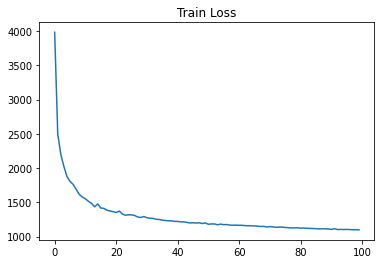

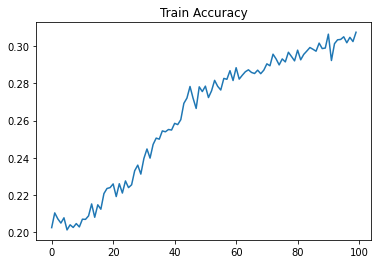

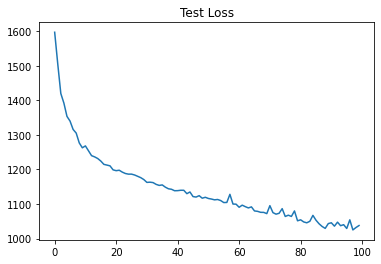

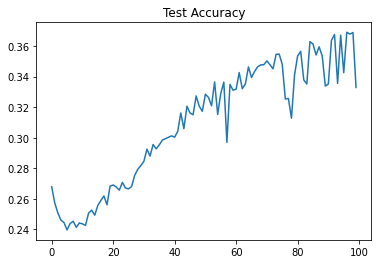

In [42]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train Loss")
plt.show()

plt.title("Train Accuracy")
plt.plot(train_accuracy)
plt.show()

plt.plot(test_loss)
plt.title("Test Loss")
plt.show()

plt.title("Test Accuracy")
plt.plot(test_accuracy)
plt.show()




### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [ ]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

# Compute the values for each column





display(stats)

### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [ ]:
from sklearn import preprocessing





### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [ ]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

# Compute the values for each column




display(stats)

### Train the network again
- Recreate your DataLoaders with the normalized data
- Reinitialize or your MLP from above and train it again


In [ ]:
# Recreate your DataLoaders with the normalized data




In [ ]:
# net = 
# optimizer = 

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(net, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(net, train_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy

In [ ]:
simple_net = 